<a href="https://www.kaggle.com/code/anandratna/age-gender-predict?scriptVersionId=138670261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [39]:
BASE_DIR = '/kaggle/input/utkface-new/UTKFace/'

In [40]:
image_paths = []
age_lables = []
gender_lables = []
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_lables.append(age)
    gender_lables.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [41]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_lables, gender_lables
df.head()

,image,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


In [42]:
gender_dict = {0: 'Male', 1:'Female'}

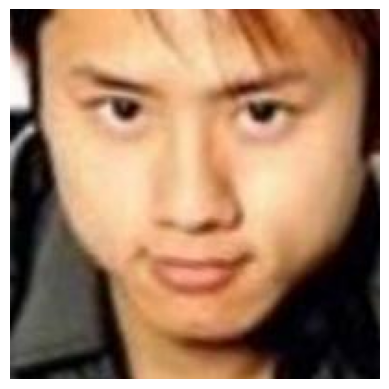

In [43]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

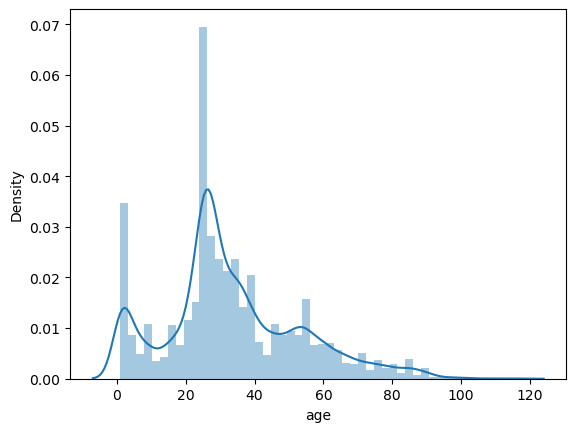

In [44]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

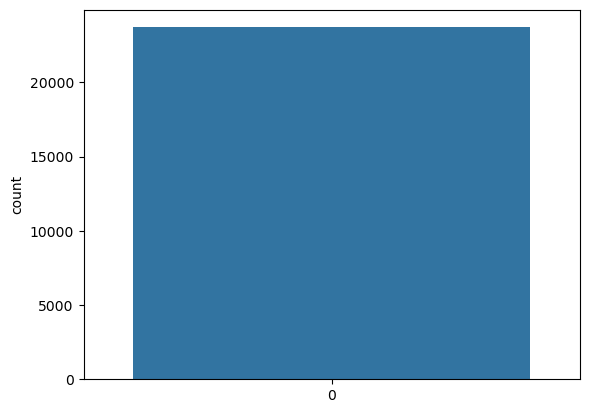

In [45]:
sns.countplot(df['gender'])

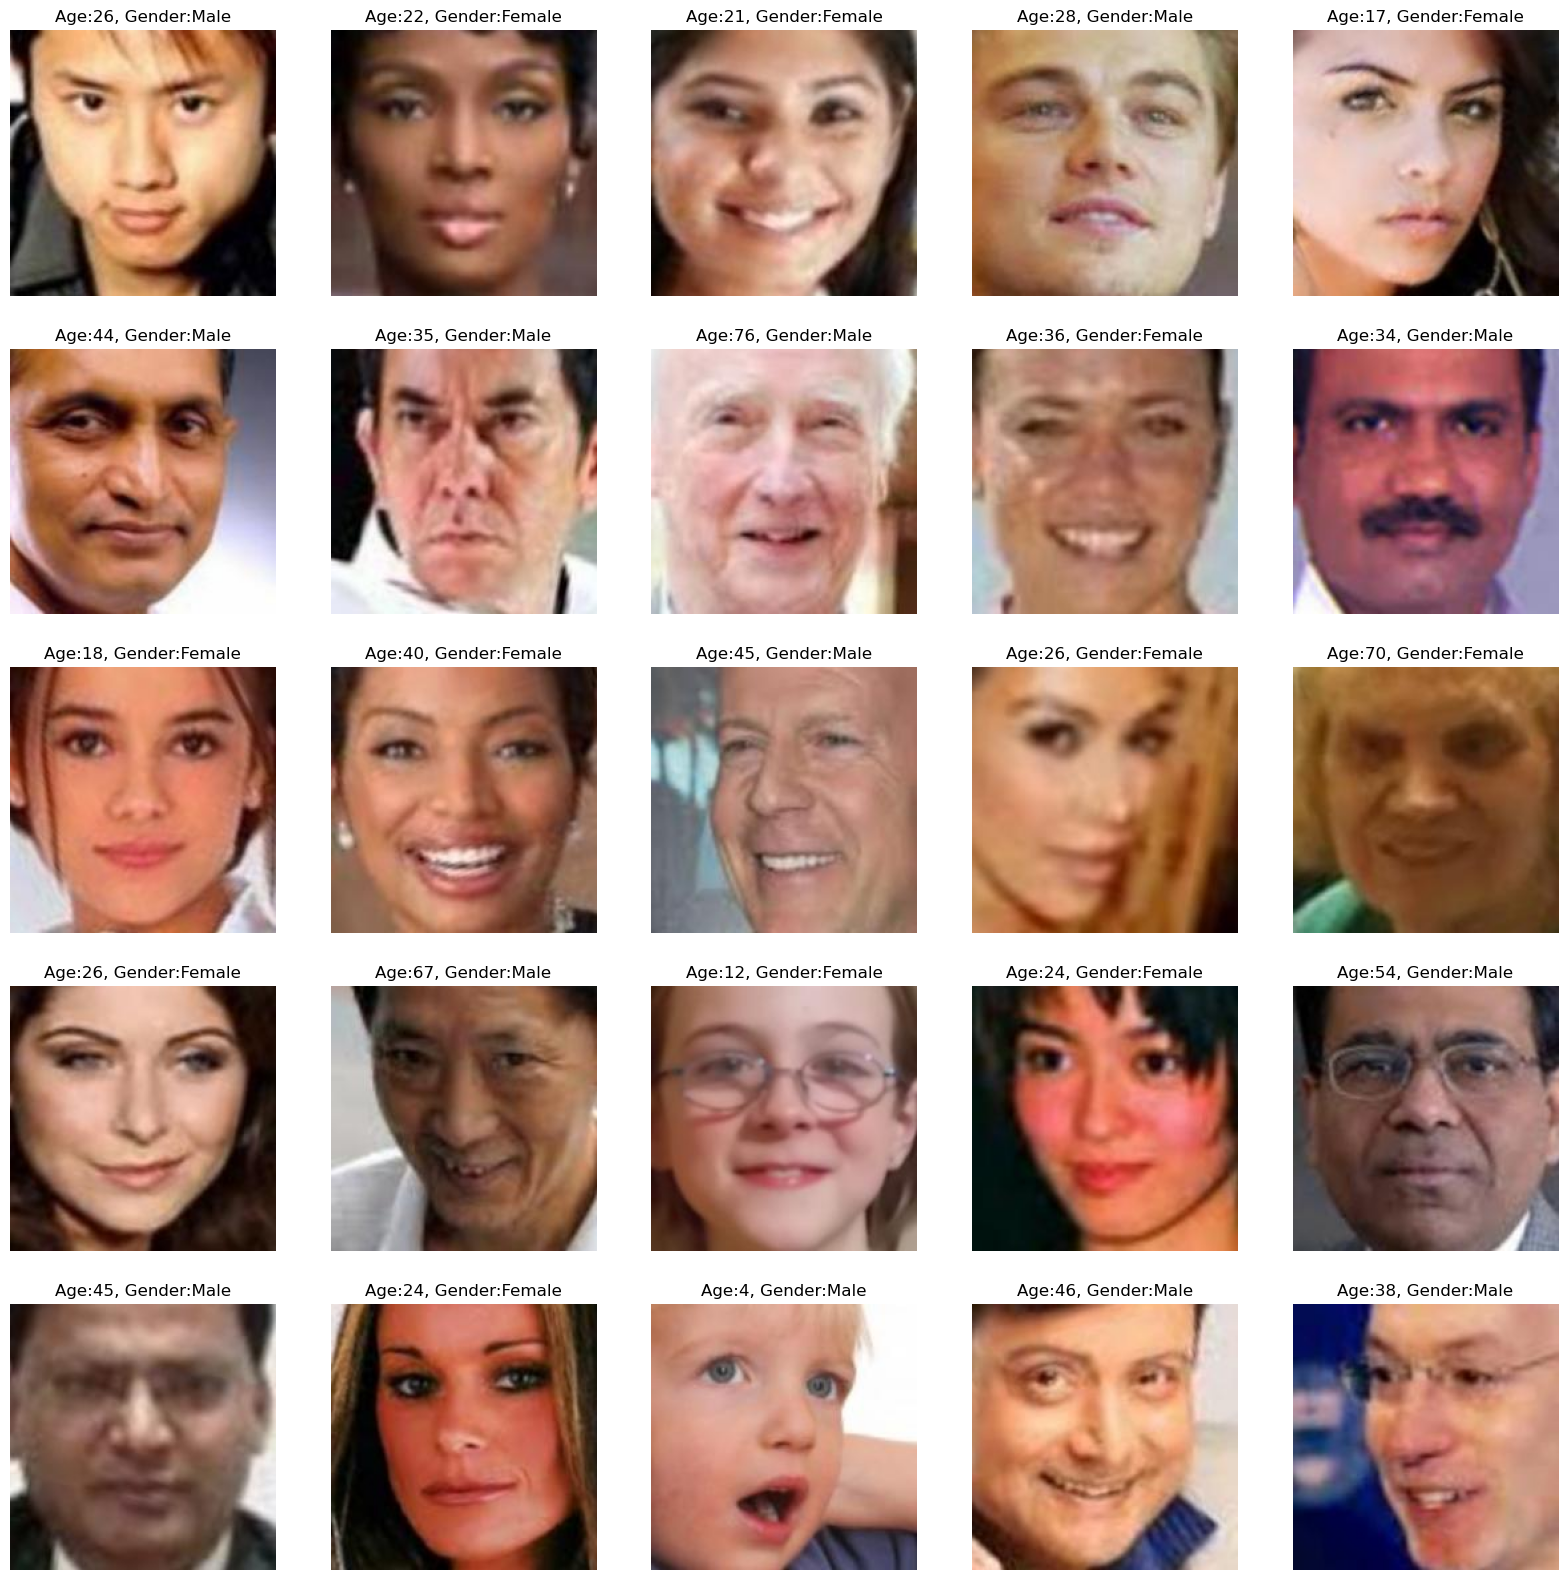

In [46]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{age}, Gender:{gender_dict[gender]}")
    plt.axis('off')

In [47]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return  features
    

In [48]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [49]:
X.shape

(23708, 128, 128, 1)

In [50]:
X=X/255.0

In [51]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [52]:
input_shape=(128, 128, 1)

**MODEL creation**

In [53]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3,3), activation = 'relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation = 'relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation = 'relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation = 'relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

dense_1=Dense(256, activation='relu')(flatten)
dense_2=Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='sigmoid', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

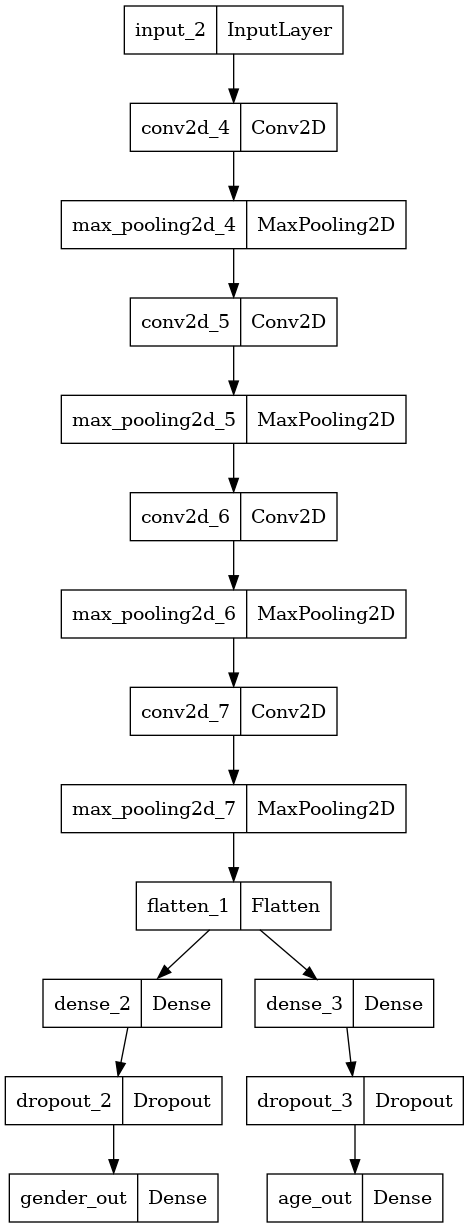

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [66]:
history_1 = model.fit(x=X, y = [y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 9s 15ms/step - loss: 32.4912 - gender_out_loss: 0.1748 - age_out_loss: 32.3164 - gender_out_accuracy: 0.9233 - age_out_accuracy: 0.0477 - val_loss: 32.9010 - val_gender_out_loss: 0.6477 - val_age_out_loss: 32.2533 - val_gender_out_accuracy: 0.8817 - val_age_out_accuracy: 0.0462
Epoch 2/30
593/593 [==============================] - 8s 14ms/step - loss: 32.4748 - gender_out_loss: 0.1585 - age_out_loss: 32.3164 - gender_out_accuracy: 0.9279 - age_out_accuracy: 0.0477 - val_loss: 32.9070 - val_gender_out_loss: 0.6537 - val_age_out_loss: 32.2533 - val_gender_out_accuracy: 0.8802 - val_age_out_accuracy: 0.0462
Epoch 3/30
593/593 [==============================] - 8s 14ms/step - loss: 32.4700 - gender_out_loss: 0.1537 - age_out_loss: 32.3164 - gender_out_accuracy: 0.9308 - age_out_accuracy: 0.0477 - val_loss: 32.6568 - val_gender_out_loss: 0.4036 - val_age_out_loss: 32.2533 - val_gender_out_accuracy: 0.8842 - val_age_out_accuracy: 0.0462
E

Original Gender: Male Original Age: 58
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Male Predicted Age: 0


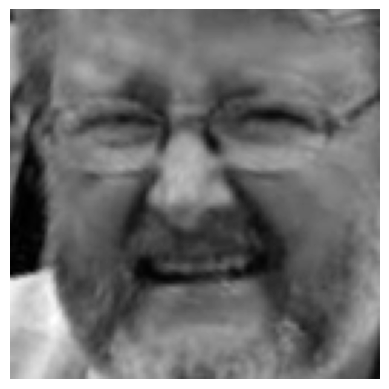

In [83]:
image_index = index_input
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');